In [2]:
import pandas as pd
import numpy as np

# sklearn stuff
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score, mean_squared_error as mse, accuracy_score
from sklearn.ensemble import RandomForestRegressor

# statsmodels
import statsmodels.api as sm

# plotting stuff
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set() # this makes things look a little bit nicer

# plotly for interactive viz
import plotly.express as px

# geopandas for maps
import geopandas as gpd

ModuleNotFoundError: No module named 'plotly'

# Pathways in Data Science: Final Project: Social 

Use this notebook to keep the code you use for your final project. We have broken it into sections for your convenience, but feel free to organize it however you see fit.

### 1. Data cleaning

Think about the following questions:
- Who created this dataset and why?
- What is the structure of my dataset? In what ways can I use it to answer my research questions?
- Is there any missing data? How should I handle it?
- Are the values in this dataset reasonable? Can we trust the data?
- Do I need to transform any of my variables (think dummy variables!)

In [ ]:
df = pd.read_csv('mobility_rates_by_college.csv')

### In the code above, the first dataset is imported. In the code below, four columns, including institution OPEID, name of college, commuting zone, and the average number of children per cohort, are dropped from the original dataset because they will not be used in our later analysis. A filtered dataset is shown below.
### The variable explanation sheet is here: https://opportunityinsights.org/wp-content/uploads/2018/03/Codebook-MRC-Table-1.pdf

In [3]:
df.drop('super_opeid', inplace=True, axis=1)
df.drop('name', inplace=True, axis=1)
df.drop('czname', inplace=True, axis=1)
#df.drop('state', inplace=True, axis=1)
df.drop('count', inplace=True, axis=1)
df

,state,par_median,k_median,par_q1,par_top1pc,kq5_cond_parq1,ktop1pc_cond_parq1,mr_kq5_pq1,mr_ktop1_pq1,trend_parq1,trend_bottom40
0,NY,30900,53000,36.477882,0.119815,44.843544,1.766630,16.357975,0.644429,-7.998776,-5.750611
1,NY,42800,57600,27.632242,0.559202,46.824234,2.556827,12.938586,0.706509,-9.186549,-12.297223
2,NY,35500,48500,32.546474,0.233515,36.021557,1.408721,11.723747,0.458489,-9.801580,-13.879366
3,NY,32500,40700,36.707489,0.000000,27.882967,0.189635,10.235138,0.069610,-5.733966,-9.072347
4,CA,36600,43000,33.116928,0.155981,29.949804,0.083620,9.918455,0.027692,-13.313572,-14.919846
...,...,...,...,...,...,...,...,...,...,...,...
2197,NJ,73100,18300,13.678579,1.148774,0.000000,0.000000,0.000000,0.000000,2.921661,10.334200
2198,UT,83900,29900,3.173054,0.743382,0.000000,0.000000,0.000000,0.000000,2.758503,-2.397896
2199,NY,37700,12700,31.265207,0.395964,0.000000,0.000000,0.000000,0.000000,1.410256,5.494441
2200,CO,81700,29800,10.138923,0.050522,0.000000,0.000000,0.000000,0.000000,4.621282,-3.173223


### In the code below, we created a new column, named "med_inc_diff (median income difference)" to display the difference between kid median income and parent median income.

In [3]:
df['med_inc_diff'] = df['k_median']-df.par_median
df

NameError: name 'df' is not defined

In [5]:
df.info()  #information of dataset 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202 entries, 0 to 2201
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               2199 non-null   object 
 1   par_median          2202 non-null   int64  
 2   k_median            2202 non-null   int64  
 3   par_q1              2202 non-null   float64
 4   par_top1pc          2202 non-null   float64
 5   kq5_cond_parq1      2202 non-null   float64
 6   ktop1pc_cond_parq1  2202 non-null   float64
 7   mr_kq5_pq1          2202 non-null   float64
 8   mr_ktop1_pq1        2202 non-null   float64
 9   trend_parq1         2199 non-null   float64
 10  trend_bottom40      2199 non-null   float64
 11  med_inc_diff        2202 non-null   int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 206.6+ KB


### In the code below, our second dataset is imported as a csv file


In [6]:
df1 = pd.read_csv('mrc_table14 (1).csv')
df1.head(20)

,super_opeid,name,type,tier,tier_name,iclevel,region,state,cz,czname,...,par_q3,par_q4,par_q5,normed_par_q1,normed_par_q2,normed_par_q3,normed_par_q4,normed_par_q5,normed_mr_kq5_pq1,normed_mr_ktop1_pq1
0,5378,Northeast State Community College,Public,Two-year (public and private not-for-profit),Two-year (public and private not-for-profit),Two-year,South,TN,100.0,Johnson City,...,0.290548,0.252833,0.113752,0.120941,0.171648,0.238232,0.285691,0.183488,0.010071,0.000054
1,3511,Milligan College,Private Non-profit,Selective private,Selective private,Four-year,South,TN,100.0,Johnson City,...,0.193688,0.302374,0.333089,0.042105,0.092802,0.170727,0.302054,0.392312,0.007501,0.000000
2,3496,King University,Private Non-profit,Selective private,Selective private,Four-year,South,TN,100.0,Johnson City,...,0.247944,0.246861,0.268218,0.060323,0.132950,0.225734,0.254704,0.326289,0.000279,0.000017
3,3527,Tusculum College,Private Non-profit,Selective private,Selective private,Four-year,South,TN,100.0,Johnson City,...,0.204641,0.243570,0.214533,0.106877,0.175430,0.191402,0.258178,0.268113,0.005527,0.000034
4,3487,East Tennessee State University,Public,Selective public,Selective public,Four-year,South,TN,100.0,Johnson City,...,0.239703,0.277606,0.244458,0.083904,0.110840,0.219106,0.287574,0.298577,0.012152,0.000184
5,3709,Emory & Henry College,Private Non-profit,Selective private,Selective private,Four-year,South,VA,100.0,Johnson City,...,0.203609,0.282648,0.309402,0.085980,0.148907,0.215882,0.293152,0.256080,0.017991,0.000057
6,7099,Virginia Highlands Community College,Public,Two-year (public and private not-for-profit),Two-year (public and private not-for-profit),Two-year,South,VA,100.0,Johnson City,...,0.283608,0.222076,0.086150,0.168448,0.190210,0.239602,0.258556,0.143184,0.011679,0.000000
7,8863,Walters State Community College,Public,Two-year (public and private not-for-profit),Two-year (public and private not-for-profit),Two-year,South,TN,200.0,Morristown,...,0.273985,0.226861,0.092399,0.121365,0.165100,0.222643,0.271413,0.219479,0.007687,0.000173
8,5351,Tennessee College Of Applied Technology - Morr...,Public,Two-year (public and private not-for-profit),Two-year (public and private not-for-profit),Two-year,South,TN,200.0,Morristown,...,0.273951,0.181763,0.057840,0.168856,0.202659,0.242284,0.236673,0.149528,0.009549,0.000181
9,3481,Carson - Newman University,Private Non-profit,Selective private,Selective private,Four-year,South,TN,200.0,Morristown,...,0.198620,0.257355,0.300031,0.075489,0.121307,0.179013,0.262866,0.361325,0.012216,0.000000


### In the code below, the four values in the region column are assigned different numerical value, and a new column named "map_region" is created with the four numerical values. The orginal "region" column is replaced by this new column in the second dataset.

In [7]:
map_region = {'Northeast': 1, 'Midwest': 2, 'South': 3, 'West': 4}

df1=df1.replace({'region': map_region})
df1.head()

,super_opeid,name,type,tier,tier_name,iclevel,region,state,cz,czname,...,par_q3,par_q4,par_q5,normed_par_q1,normed_par_q2,normed_par_q3,normed_par_q4,normed_par_q5,normed_mr_kq5_pq1,normed_mr_ktop1_pq1
0,5378,Northeast State Community College,Public,Two-year (public and private not-for-profit),Two-year (public and private not-for-profit),Two-year,3.0,TN,100.0,Johnson City,...,0.290548,0.252833,0.113752,0.120941,0.171648,0.238232,0.285691,0.183488,0.010071,0.000054
1,3511,Milligan College,Private Non-profit,Selective private,Selective private,Four-year,3.0,TN,100.0,Johnson City,...,0.193688,0.302374,0.333089,0.042105,0.092802,0.170727,0.302054,0.392312,0.007501,0.000000
2,3496,King University,Private Non-profit,Selective private,Selective private,Four-year,3.0,TN,100.0,Johnson City,...,0.247944,0.246861,0.268218,0.060323,0.132950,0.225734,0.254704,0.326289,0.000279,0.000017
3,3527,Tusculum College,Private Non-profit,Selective private,Selective private,Four-year,3.0,TN,100.0,Johnson City,...,0.204641,0.243570,0.214533,0.106877,0.175430,0.191402,0.258178,0.268113,0.005527,0.000034
4,3487,East Tennessee State University,Public,Selective public,Selective public,Four-year,3.0,TN,100.0,Johnson City,...,0.239703,0.277606,0.244458,0.083904,0.110840,0.219106,0.287574,0.298577,0.012152,0.000184


### In the code below, all unneccessary columns in the second dataset are filtered out, including Institution OPEID, name of college, school type, name of college tier, Four-year or two-year college, Commuting zone ID, Commuting zone name, Combined state and county fips code, County, Indicator of multiple colleges. The filtered dataset is then displayed below.

In [8]:
df1.drop('super_opeid', inplace=True, axis=1)
df1.drop('name', inplace=True, axis=1)
df1.drop('type', inplace=True, axis=1)
df1.drop('tier_name', inplace=True, axis=1)
df1.drop('iclevel', inplace=True, axis=1)
df1.drop('cz', inplace=True, axis=1)
df1.drop('czname', inplace=True, axis=1)
df1.drop('cfips', inplace=True, axis=1)
df1.drop('county', inplace=True, axis=1)
df1.drop('multi', inplace=True, axis=1)

df1.head()

,tier,region,state,count,mr_kq5_pq1,mr_ktop1_pq1,par_q1,par_q2,par_q3,par_q4,par_q5,normed_par_q1,normed_par_q2,normed_par_q3,normed_par_q4,normed_par_q5,normed_mr_kq5_pq1,normed_mr_ktop1_pq1
0,Two-year (public and private not-for-profit),3.0,TN,701.333333,0.011880,0.000063,0.142665,0.200201,0.290548,0.252833,0.113752,0.120941,0.171648,0.238232,0.285691,0.183488,0.010071,0.000054
1,Selective private,3.0,TN,164.666667,0.009594,0.000000,0.053852,0.116997,0.193688,0.302374,0.333089,0.042105,0.092802,0.170727,0.302054,0.392312,0.007501,0.000000
2,Selective private,3.0,TN,121.666667,0.000345,0.000022,0.074697,0.162279,0.247944,0.246861,0.268218,0.060323,0.132950,0.225734,0.254704,0.326289,0.000279,0.000017
3,Selective private,3.0,TN,189.000000,0.006662,0.000041,0.128823,0.208433,0.204641,0.243570,0.214533,0.106877,0.175430,0.191402,0.258178,0.268113,0.005527,0.000034
4,Selective public,3.0,TN,1442.333333,0.014987,0.000227,0.103482,0.134751,0.239703,0.277606,0.244458,0.083904,0.110840,0.219106,0.287574,0.298577,0.012152,0.000184


### In the code below, we initially created a column that gets the state abbreviation for the convenience of merging. However, we then found out that both datasets already have state name in abbreviation, so we did not execute the code below. We still included the code to show our progress.

In [9]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}


### In the code below, we first sort the par_q1 column, which is the fraction of parents in the top income quintile, in both data frames in Ascending order. Then, to merge the two datasets with par_q1, we convert the decimals in the second dataset into percentage by multiplying every value by 100; in this way, both par_q1 column now have the same unit. Finally, we round the values to four decimal places for easier calculation.

In [10]:
#df1['state'] = df1.state.map(us_state_abbrev)

df = df.sort_values('par_q1')
df1 = df1.sort_values('par_q1')
df1['par_q1'] = 100 * df1['par_q1']
df1['par_q1'] = round(df1['par_q1'], 4)
df['par_q1'] = round(df['par_q1'], 4)

### In the below cell, because all values for the college "tier" column were presented in String, we assigned a numeric value to every string value according to the table presented in the tier section in https://opportunityinsights.org/wp-content/uploads/2019/01/Codebook-MRC-Table-14.pdf for later analysis. Then a new column is created with the corresponding numerical values (from 1, representing top schools, to 14, did not attend college), and the old column "tier" is replaced by this new column named "mapping".

In [11]:
mapping = {'Ivy Plus': 1, 'Other elite schools (public and private)': 2, 'Highly selective public': 3, 'Highly selective private': 4, 'Selective public': 5, 'Selective private': 6, 'Nonselective 4-year public': 7, 'Nonselective four-year public': 7, 'Nonselective 4-year private not-for-profit': 8, 'Nonselective four-year private not-for-profit': 8, 'Two-year (public and private not-for-profit)': 9, 'Four-year for-profit': 10, 'Two-year for-profit': 11, 'Less than two year schools of any type': 12, 'Less than two-year schools of any type': 12, 'Attending college with insufficient data': 13, 'Not in college between the ages of 19-22': 14}

df1=df1.replace({'tier': mapping})

### Here, we merged the two filtered datasets into one dataset named mergeddf by "state" and "par_q1" columns.

In [12]:
mergeddf = pd.merge(df,df1,on=['state', 'par_q1'])
mergeddf

,state,par_median,k_median,par_q1,par_top1pc,kq5_cond_parq1,ktop1pc_cond_parq1,mr_kq5_pq1_x,mr_ktop1_pq1_x,trend_parq1,...,par_q3,par_q4,par_q5,normed_par_q1,normed_par_q2,normed_par_q3,normed_par_q4,normed_par_q5,normed_mr_kq5_pq1,normed_mr_ktop1_pq1
0,VA,226700,78200,1.1190,17.485773,51.023060,6.717955,0.570929,0.075171,0.054177,...,0.057592,0.099141,0.813482,0.011190,0.018595,0.057592,0.099141,0.813482,0.005709,0.000752
1,VA,133800,50000,1.2670,1.889873,60.731060,3.942438,0.769486,0.049952,1.016655,...,0.086939,0.200604,0.652901,0.016689,0.058005,0.101466,0.229020,0.594821,0.010135,0.000658
2,VA,147100,59800,1.3461,4.454731,38.898666,1.564668,0.523604,0.021062,0.892539,...,0.080365,0.165884,0.698166,0.013461,0.042123,0.080365,0.165884,0.698166,0.005236,0.000211
3,NC,208500,60300,1.3817,17.505419,29.688522,12.316253,0.410206,0.170173,1.193419,...,0.069171,0.109718,0.771911,0.013817,0.035383,0.069171,0.109718,0.771911,0.004102,0.001702
4,IN,165400,78800,1.4380,10.973148,62.399189,12.125051,0.897273,0.174353,0.350191,...,0.067018,0.159587,0.724720,0.014380,0.034295,0.067018,0.159587,0.724720,0.008973,0.001744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,TX,28900,17100,47.1056,0.118524,7.490148,0.193381,3.528283,0.091094,-15.556823,...,0.129053,0.071529,0.031043,0.385031,0.290943,0.164147,0.108042,0.051836,0.028839,0.000745
2194,TX,26400,29800,47.3497,0.141612,14.033644,0.305165,6.644889,0.144494,-13.627665,...,0.130511,0.082762,0.046418,0.146741,0.202149,0.241399,0.245048,0.164663,0.020593,0.000448
2195,NY,25100,14400,49.9795,0.277631,4.305980,0.036805,2.152106,0.018395,-20.665297,...,0.144719,0.023157,0.031043,0.443261,0.298456,0.190436,0.036040,0.031807,0.019087,0.000163
2196,TX,23900,27500,52.3607,0.071010,13.195425,0.236793,6.909216,0.123986,-18.819628,...,0.110625,0.064454,0.033627,0.184434,0.230512,0.232564,0.216909,0.135581,0.024337,0.000437


### In the below cell, because both parent median income and kid median income are in large numbers, we divided them by a thousand for easier calculation and visualization. Both of them will have the unit of thousand dollars in the later analysis. For normed_mr_kq5_pq1, which is the Normed mobility rate (joint probability of parents in normed bottom quintile and child in top quintile of the income distribution), we converted it into percentages by multiplying by 100.

In [13]:
mergeddf.par_median = mergeddf.par_median/1000
mergeddf.k_median = mergeddf.k_median/1000
mergeddf.normed_mr_kq5_pq1 = mergeddf.normed_mr_kq5_pq1*100

### The information of our merged dataset

In [14]:
mergeddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2198 entries, 0 to 2197
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                2195 non-null   object 
 1   par_median           2198 non-null   float64
 2   k_median             2198 non-null   float64
 3   par_q1               2198 non-null   float64
 4   par_top1pc           2198 non-null   float64
 5   kq5_cond_parq1       2198 non-null   float64
 6   ktop1pc_cond_parq1   2198 non-null   float64
 7   mr_kq5_pq1_x         2198 non-null   float64
 8   mr_ktop1_pq1_x       2198 non-null   float64
 9   trend_parq1          2195 non-null   float64
 10  trend_bottom40       2195 non-null   float64
 11  med_inc_diff         2198 non-null   int64  
 12  tier                 2198 non-null   int64  
 13  region               2195 non-null   float64
 14  count                2198 non-null   float64
 15  mr_kq5_pq1_y         2198 non-null   f

### In the below cell, we filtered out all the unnecessary columns that are unrelated to mobility rate or will not be included in our later multilinear regression models, including categorical data and numerical values that don't influence the predicted variable, mobility rate.

In [15]:
mergeddf.drop('trend_parq1', inplace=True, axis=1)
mergeddf.drop('trend_bottom40', inplace=True, axis=1)
mergeddf.drop('region', inplace=True, axis=1)
mergeddf.drop('count', inplace=True, axis=1)
mergeddf.drop('par_q1', inplace=True, axis=1)
mergeddf.drop('par_q2', inplace=True, axis=1)
mergeddf.drop('par_q3', inplace=True, axis=1)
mergeddf.drop('par_q4', inplace=True, axis=1)
mergeddf.drop('par_q5', inplace=True, axis=1)
mergeddf.drop('mr_kq5_pq1_x', inplace=True, axis=1)
mergeddf.drop('mr_ktop1_pq1_x', inplace=True, axis=1)
mergeddf.drop('mr_kq5_pq1_y', inplace=True, axis=1)
mergeddf.drop('mr_ktop1_pq1_y', inplace=True, axis=1)
mergeddf.drop('normed_par_q1', inplace=True, axis=1)
mergeddf.drop('normed_par_q2', inplace=True, axis=1)
mergeddf.drop('normed_par_q3', inplace=True, axis=1)
mergeddf.drop('normed_par_q4', inplace=True, axis=1)
mergeddf.drop('normed_par_q5', inplace=True, axis=1)
mergeddf.drop('kq5_cond_parq1', inplace=True, axis=1)
mergeddf.drop('ktop1pc_cond_parq1', inplace=True, axis=1)

### In the below cell, we imported the third set of data. This dataset will not be used for our regression model, but it will be used for exploratory analysis, which helps us to observe correlations between additional variables.

In [16]:
df2 = pd.read_csv('mrc_table8.csv')
df2.head(20)

,cohort,par_ventile,tier,tier_name,par_mean,k_mean,k_rank,k_top1pc,k_top5pc,k_top10pc,...,k_q3,k_q2,k_q1,k_nowork,married,k_median,k_median_nozero,count,tot_count,density
0,1980,1,1,Ivy Plus,6200.0,106300.0,0.700131,0.096970,0.333333,0.442424,...,0.066667,0.078788,0.157576,0.151515,0.581818,68100.0,83800.0,165.0,17653.0,0.009347
1,1980,1,2,Other elite schools (public and private),6500.0,71800.0,0.670964,0.050000,0.216667,0.324242,...,0.092424,0.107576,0.133333,0.124242,0.493939,56600.0,64600.0,660.0,60703.0,0.010873
2,1980,1,3,Highly selective public,7000.0,63600.0,0.649980,0.032670,0.158381,0.267756,...,0.132812,0.118608,0.117898,0.111506,0.485795,49300.0,55900.0,1408.0,126735.0,0.011110
3,1980,1,4,Highly selective private,6800.0,60300.0,0.625801,0.028302,0.117925,0.233491,...,0.132075,0.120283,0.141509,0.136792,0.478774,48300.0,53700.0,424.0,42920.0,0.009879
4,1980,1,5,Selective public,7200.0,41300.0,0.555779,0.007898,0.052871,0.113826,...,0.208976,0.173295,0.135291,0.124884,0.436629,35100.0,39700.0,10762.0,616241.0,0.017464
5,1980,1,6,Selective private,7000.0,43900.0,0.567805,0.010263,0.068273,0.136546,...,0.184293,0.166444,0.142793,0.133423,0.463632,36900.0,42200.0,2241.0,149238.0,0.015016
6,1980,1,7,Nonselective four-year public,7500.0,30600.0,0.481619,0.000748,0.020568,0.062827,...,0.238594,0.232610,0.176889,0.160060,0.371354,25500.0,31300.0,2674.0,77371.0,0.034561
7,1980,1,8,Nonselective four-year private not-for-profit,7000.0,28900.0,0.448566,0.008565,0.027837,0.057816,...,0.218415,0.252677,0.222698,0.201285,0.408994,19900.0,28800.0,467.0,17937.0,0.026036
8,1980,1,9,Two-year (public and private not-for-profit),7200.0,27700.0,0.450111,0.002165,0.017218,0.045210,...,0.238584,0.254946,0.202537,0.186125,0.348135,21800.0,28400.0,19863.0,614500.0,0.032324
9,1980,1,10,Four-year for-profit,7300.0,28800.0,0.465387,0.002073,0.020041,0.053905,...,0.245335,0.260539,0.172771,0.156876,0.281963,23500.0,29500.0,1447.0,32980.0,0.043875


### The below cell creates a new column that displays the difference between the value of Kid mean income and the value of parent mean income, which will be used in our exploratory analysis later.

In [17]:
df2['mean_inc_diff'] = df2['k_mean']-df2['par_mean']
df2

,cohort,par_ventile,tier,tier_name,par_mean,k_mean,k_rank,k_top1pc,k_top5pc,k_top10pc,...,k_q2,k_q1,k_nowork,married,k_median,k_median_nozero,count,tot_count,density,mean_inc_diff
0,1980,1,1,Ivy Plus,6200.0,106300.0,0.700131,0.096970,0.333333,0.442424,...,0.078788,0.157576,0.151515,0.581818,68100.0,83800.0,165.0,17653.0,0.009347,100100.0
1,1980,1,2,Other elite schools (public and private),6500.0,71800.0,0.670964,0.050000,0.216667,0.324242,...,0.107576,0.133333,0.124242,0.493939,56600.0,64600.0,660.0,60703.0,0.010873,65300.0
2,1980,1,3,Highly selective public,7000.0,63600.0,0.649980,0.032670,0.158381,0.267756,...,0.118608,0.117898,0.111506,0.485795,49300.0,55900.0,1408.0,126735.0,0.011110,56600.0
3,1980,1,4,Highly selective private,6800.0,60300.0,0.625801,0.028302,0.117925,0.233491,...,0.120283,0.141509,0.136792,0.478774,48300.0,53700.0,424.0,42920.0,0.009879,53500.0
4,1980,1,5,Selective public,7200.0,41300.0,0.555779,0.007898,0.052871,0.113826,...,0.173295,0.135291,0.124884,0.436629,35100.0,39700.0,10762.0,616241.0,0.017464,34100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3523,1991,99,10,Four-year for-profit,1654500.0,14100.0,0.458245,0.025974,0.081169,0.126623,...,0.272727,0.243506,0.233766,0.077922,6800.0,12800.0,308.0,119156.0,0.002585,-1640400.0
3524,1991,99,11,Two-year for-profit,1559500.0,18600.0,0.541376,0.019608,0.147059,0.235294,...,0.235294,0.176471,0.176471,0.147059,12300.0,18000.0,102.0,73465.0,0.001388,-1540900.0
3525,1991,99,12,Less than two-year schools of any type,1442500.0,13600.0,0.462886,0.018868,0.075472,0.094340,...,0.226415,0.226415,0.226415,0.188679,10500.0,NaN,53.0,29172.0,0.001817,-1428900.0
3526,1991,99,13,Attending college with insufficient data,1475100.0,17000.0,0.500465,0.030916,0.096314,0.158145,...,0.267539,0.196195,0.192628,0.104637,9700.0,14800.0,841.0,222161.0,0.003786,-1458100.0


### In the cell below, we imported the fourth set of data. Again, this will not be used for our regression model, but will be used in the exploratory analysis section.
https://opportunityinsights.org/wp-content/uploads/2018/04/table_1.pdf

In [18]:
df3 = pd.read_csv('table_1.csv')
df3.head(5)

,par_pctile,count_pooled,count_aian_pooled,count_asian_pooled,count_black_pooled,count_hisp_pooled,count_white_pooled,density_aian_pooled,density_asian_pooled,density_black_pooled,...,kir_1par_black_male,kir_1par_white_male,kir_2par_black_male,kir_2par_white_male,kir_par_nohome_black_male,kir_par_nohome_white_male,spouse_rank_black_female,spouse_rank_black_male,spouse_rank_white_female,spouse_rank_white_male
0,1,213100,3300,9100,59500,34900,69000,1.996,1.328,2.161,...,29.18,37.54,32.97,41.18,29.42,36.76,34.37,27.42,47.18,37.86
1,2,213100,3000,8900,55500,39900,69000,1.814,1.300,2.016,...,30.25,39.61,35.02,42.54,29.32,39.03,34.87,27.35,48.29,38.36
2,3,213100,2900,8900,54000,40400,72000,1.755,1.300,1.961,...,31.23,40.27,35.70,43.20,31.26,39.04,35.11,27.56,48.70,38.79
3,4,213100,2800,8900,53000,41900,73500,1.694,1.300,1.925,...,32.02,41.34,35.00,43.47,32.16,40.97,35.19,27.59,48.94,39.27
4,5,213100,2900,8900,52000,42400,75000,1.755,1.300,1.889,...,32.63,41.52,36.00,43.56,32.38,40.56,35.14,28.00,49.54,39.50


### 2. Exploratory data analysis

Explore the data with visualizations and summary statistics to help guide your modeling. Consider:
- The distribution of the categorical/numerical variables (think histograms, bar plots, etc)
- Relationships between variables (scatterplots, lineplots, etc)

## Heatmap for the Merged data set
###  There is positive correlations between social mobility rate and  k_median, and a negative correlation between par-median and college tier or kid median income which means as the colleges tier decreases to 1, which is the highest tier of school level, median income increases. There is also strong correlation between kid median income and parent median income which indicated collinearity.

<AxesSubplot:>

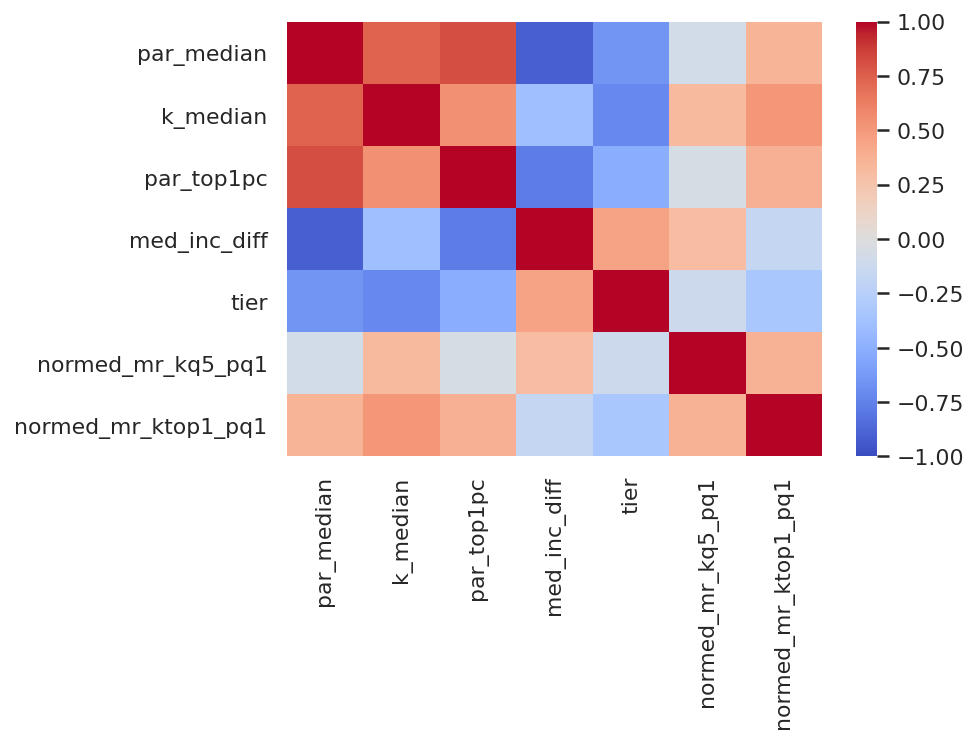

In [58]:
sns.heatmap(mergeddf.corr(), vmin=-1, vmax=1, cmap='coolwarm')

## Heatmap for the third data set
### - Shows very strong correlation in areas where the have an overall metric and then they break it up ex. average kid income for all is 1 feature then they break it up by race and gender to make several other features.

<AxesSubplot:>

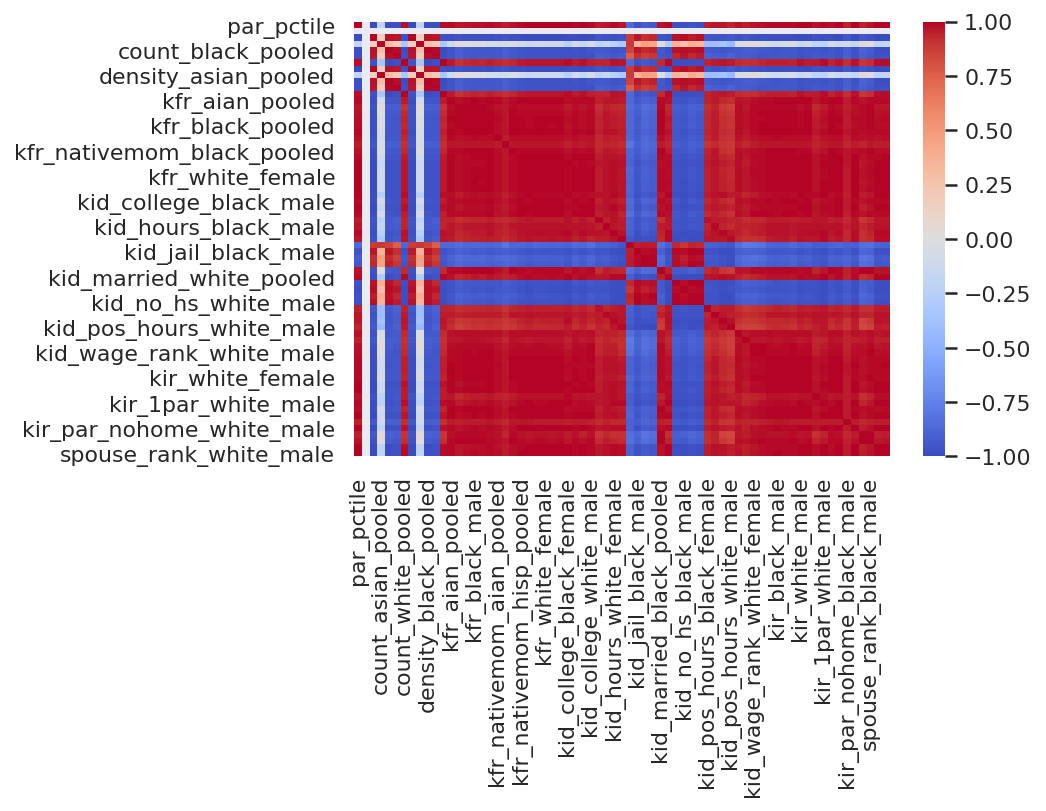

In [23]:
sns.heatmap(df3.corr(), vmin=-1, vmax=1, cmap='coolwarm')

# Corresponding Graph Descriptions

### distribution of median kids income across all data 

### distribution of median parent household income across all data

### distribution of median income differences

### distribution of mean income differences

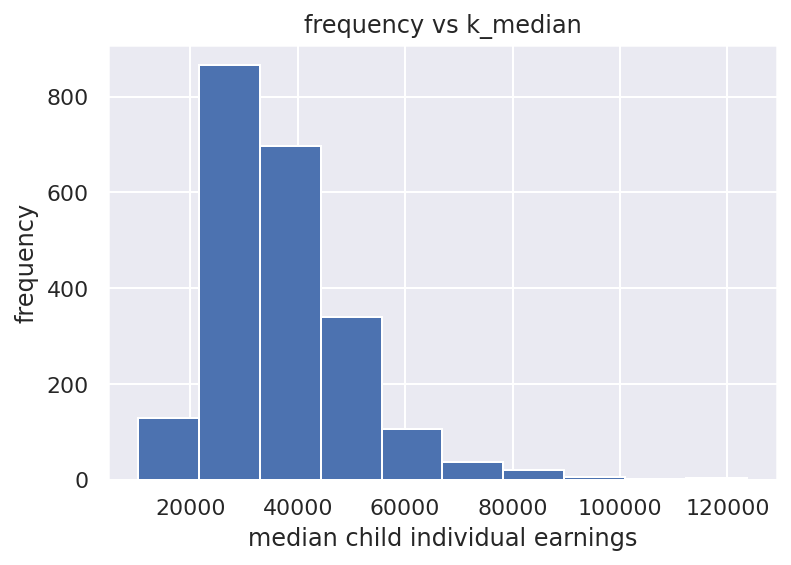

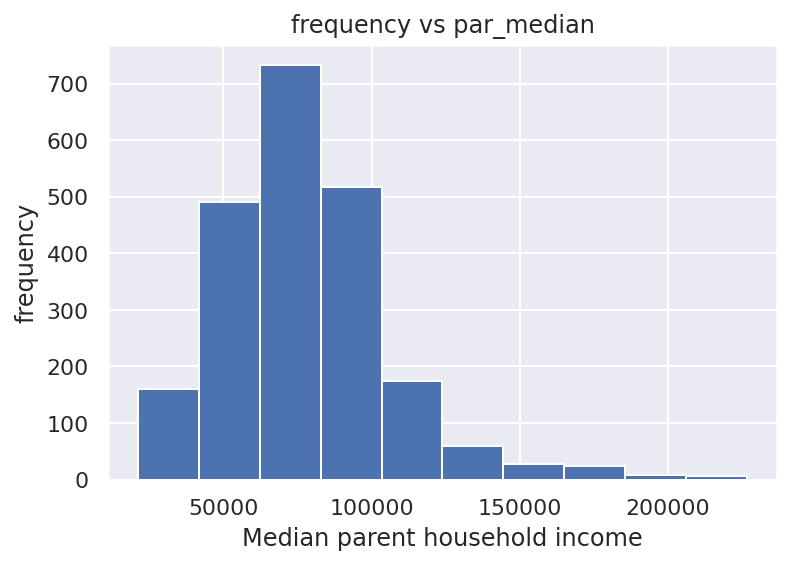

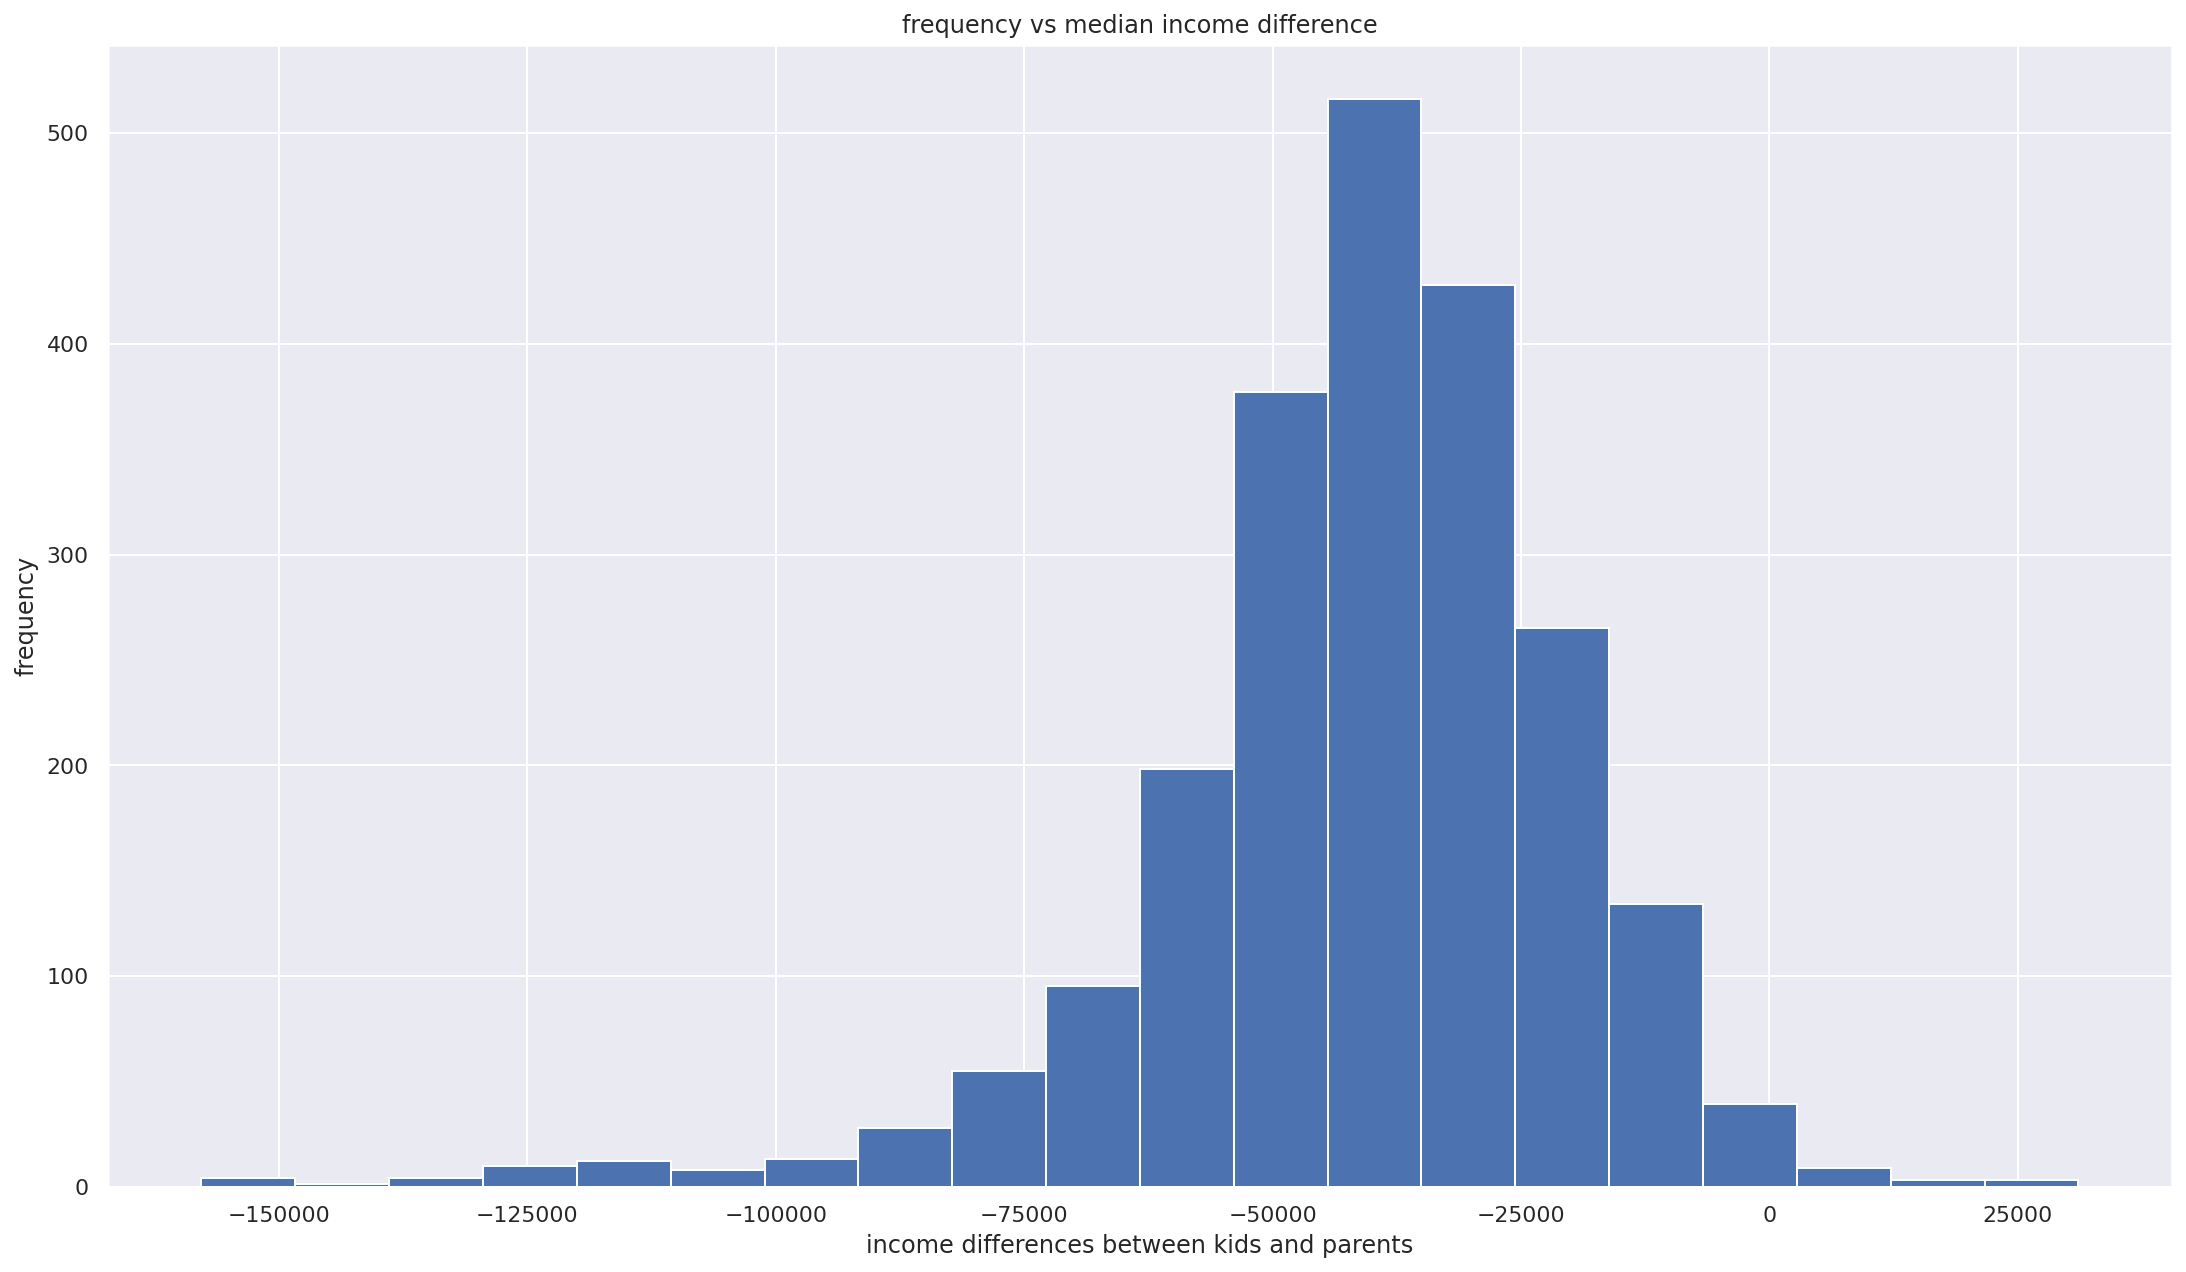

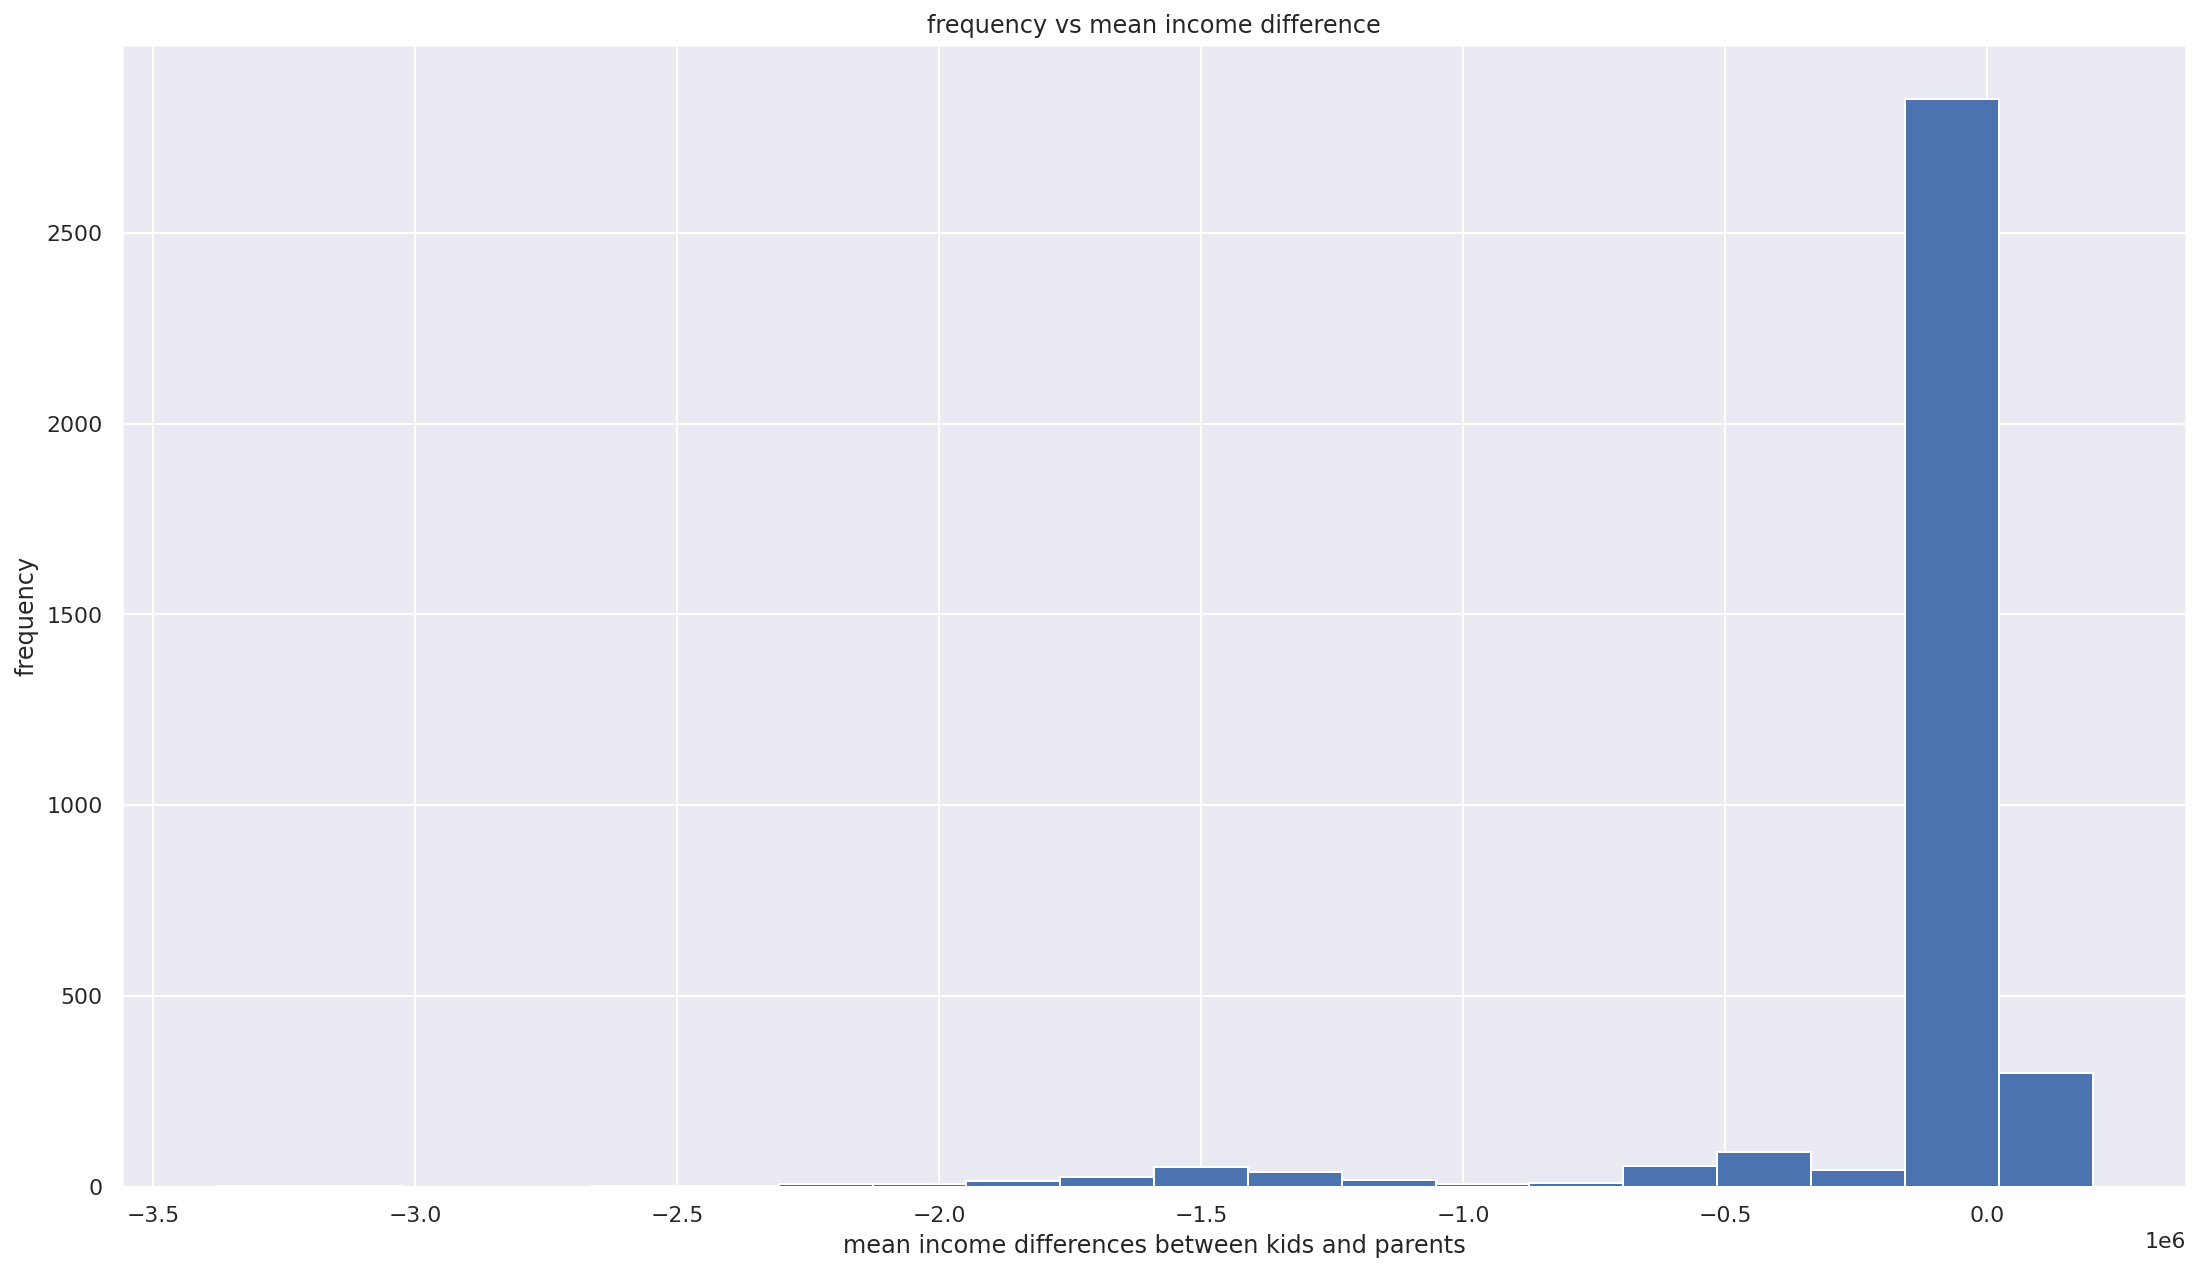

In [54]:


#distribution of median kids income across all data
x = df["k_median"]
plt.hist(x, bins = 10)
plt.xlabel("median child individual earnings")
plt.ylabel("frequency")
plt.title("frequency vs k_median")
plt.show()

#distribution of median parent household income across all data
x = df["par_median"]
plt.hist(x, bins = 10)
plt.xlabel("Median parent household income")
plt.ylabel("frequency")
plt.title("frequency vs par_median")
plt.show()



#distribution of median income differences
x = df["med_inc_diff"]
plt.hist(x, bins = 20)
plt.xlabel("income differences between kids and parents")
plt.ylabel("frequency")
plt.title("frequency vs median income difference")
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)
plt.show()

#distribution of mean income differences
x = df2["mean_inc_diff"]
plt.hist(x, bins = 20)
plt.xlabel("mean income differences between kids and parents")
plt.ylabel("frequency")
plt.title("frequency vs mean income difference")
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)
plt.show()

## Observations
### Kids are overall making less money than parents which makes sense because the parent income feature can be more than one earners.

### 3. Predictive modeling

Use one of the methods (or a variant) to test your hypothesis. Recall that we have learned:
- Linear Regression
- Random Forests
- k-NN
- k-means

Be sure to report the appropriate error metrics for your model. If you are doing a regression task, report `MSE` or $R^2$. If you are doing a classification task, report the `accuracy`. Make sure to consider how well your model generalizes (train/test and cross validation).

##### First Multivariable Regression: k_median and tier predictors

In [32]:
X = mergeddf[['k_median','tier']]
Y = mergeddf['normed_mr_kq5_pq1']
 
# with sklearn
regr = LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)



# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)




Intercept: 
 -0.6437924677399027
Coefficients: 
 [0.04684113 0.11827877]
                            OLS Regression Results                            
Dep. Variable:      normed_mr_kq5_pq1   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     147.1
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           1.07e-60
Time:                        20:15:02   Log-Likelihood:                -3573.9
No. Observations:                2198   AIC:                             7154.
Df Residuals:                    2195   BIC:                             7171.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


$R^2 = 0.118$, indicating low accuracy. However, P values less than 0.05 indicate significant correlations.

##### Second Multivariable Regression: par_median and tier predictors

In [33]:
X = mergeddf[['par_median','tier']]
Y = mergeddf['normed_mr_kq5_pq1']
 
# with sklearn
regr = LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)



# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 4.238187351032467
Coefficients: 
 [-0.01318013 -0.1810957 ]
                            OLS Regression Results                            
Dep. Variable:      normed_mr_kq5_pq1   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     73.19
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           1.70e-31
Time:                        20:15:03   Log-Likelihood:                -3641.3
No. Observations:                2198   AIC:                             7289.
Df Residuals:                    2195   BIC:                             7306.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


$R^2 = 0.063$, indicating low accuracy. However, P values less than 0.05 indicate significant correlations.

### 4. Visualize results


Create a few well-designed visualizations that emphasize your main findings. Recall the principles we learned in class, and feel free to use any tools you want to make these (you should make the basic plots in Python, but can use PowerPoint/Keynote/anything else to make them look extra good!)

### Regression Visualization
#### y-axis is Social Mobility Rate

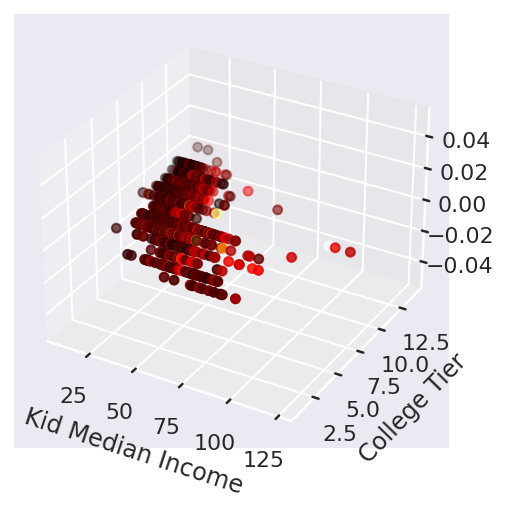

In [73]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = mergeddf["k_median"]
y = mergeddf["tier"]

c = mergeddf["normed_mr_kq5_pq1"]
plt.xlabel("Kid Median Income")
plt.ylabel('College Tier') 


img = ax.scatter(x, y, c=c, cmap=plt.hot())

plt.show()

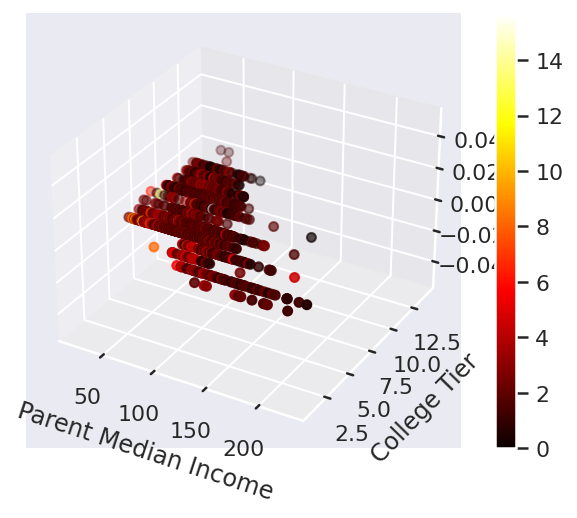

In [74]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = mergeddf["par_median"]
y = mergeddf["tier"]

c = mergeddf["normed_mr_kq5_pq1"]
plt.xlabel("Parent Median Income")
plt.ylabel('College Tier') 

img = ax.scatter(x, y, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()

### Bar Graph Details:
The rank is a percentile so the higher the greater the income of the person.
Every bar graph has the data grouped by average parent income rank ascending on each x-axis.

Average Kid Household Income Rank per Parent Household Income Rank

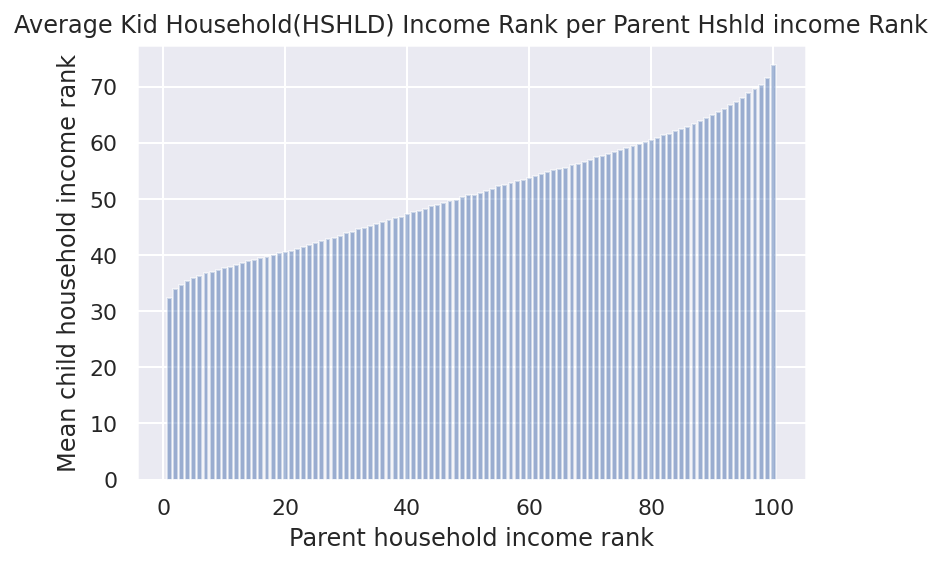

In [34]:
plt.bar(df3['par_pctile'],df3['kfr_pooled'], align='center', alpha=0.5)

plt.ylabel('Mean child household income rank')
plt.xlabel('Parent household income rank')

plt.title('Average Kid Household(HSHLD) Income Rank per Parent Hshld income Rank')

plt.show()

## Average Black Female Kid Household Income Rank per Parent Household Income Rank

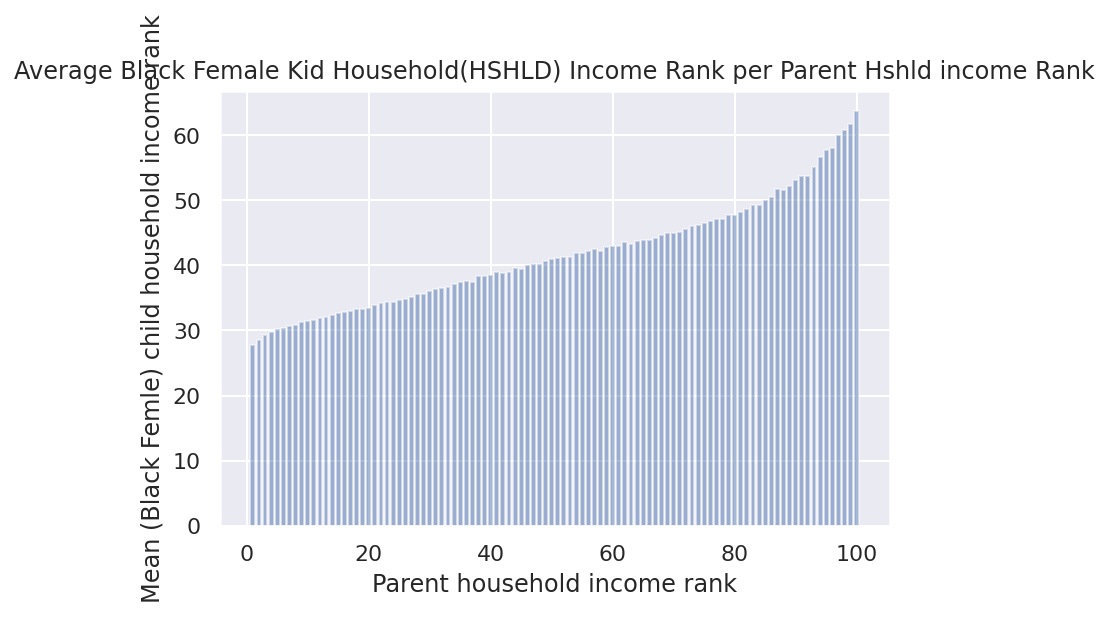

In [35]:

plt.bar(df3['par_pctile'],df3['kfr_black_female'], align='center', alpha=0.5)

plt.xlabel('Parent household income rank')
plt.ylabel('Mean (Black Femle) child household income rank')
plt.title('Average Black Female Kid Household(HSHLD) Income Rank per Parent Hshld income Rank')

plt.show()

## Average White Female Kid Household Income Rank per Parent Household Income Rank

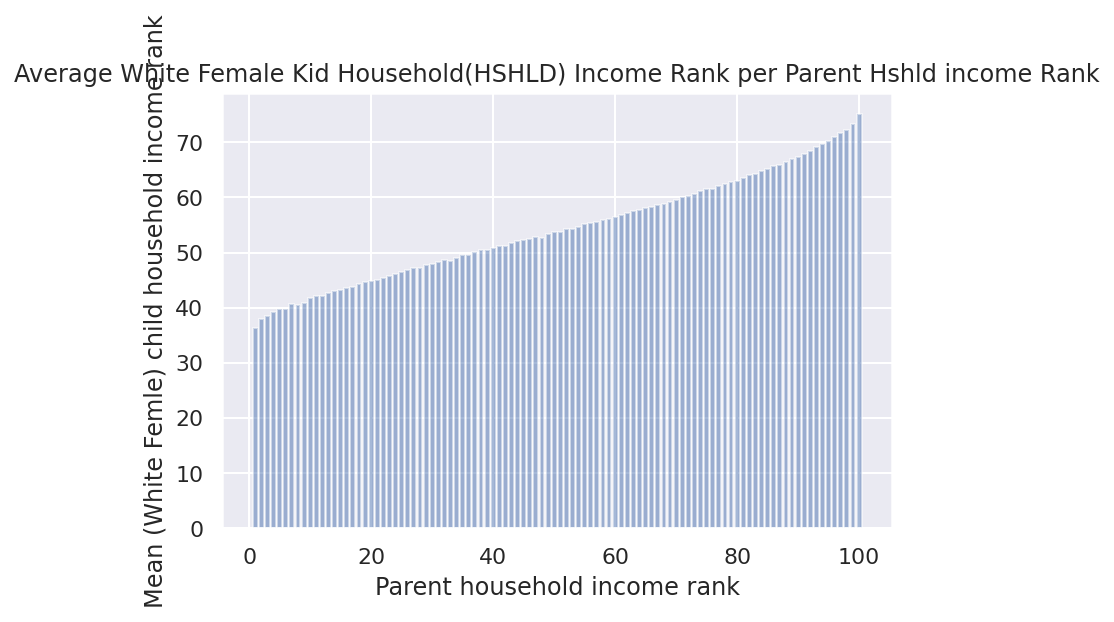

In [36]:
plt.bar(df3['par_pctile'],df3['kfr_white_female'], align='center', alpha=0.5)

plt.xlabel('Parent household income rank')
plt.ylabel('Mean (White Femle) child household income rank')
plt.title('Average White Female Kid Household(HSHLD) Income Rank per Parent Hshld income Rank')

plt.show()

## Average Black Male Kid Household Income Rank per Parent Household Income Rank

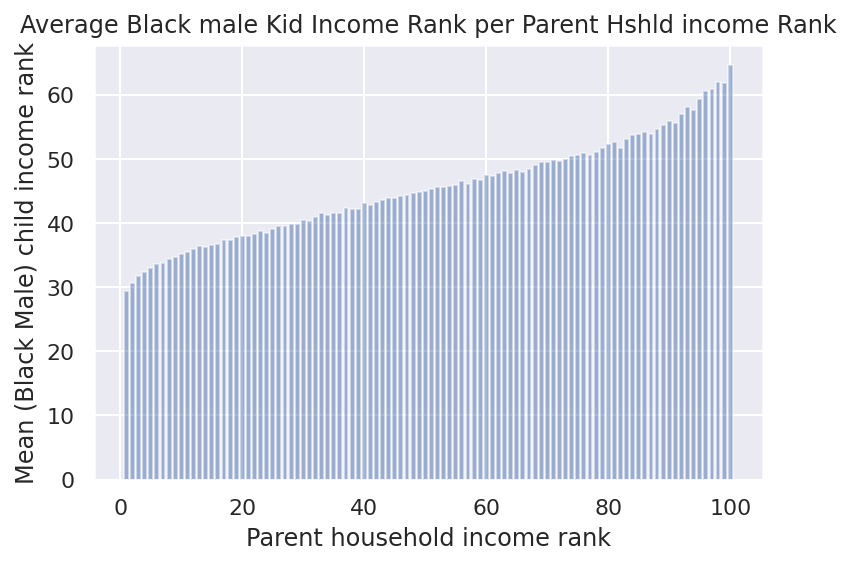

In [37]:
plt.bar(df3['par_pctile'],df3['kir_black_male'], align='center', alpha=0.5)

plt.xlabel('Parent household income rank')
plt.ylabel('Mean (Black Male) child income rank')
plt.title('Average Black male Kid Income Rank per Parent Hshld income Rank')

plt.show()

## Average White Male Kid Individual Income Rank per Parent Household Income Rank

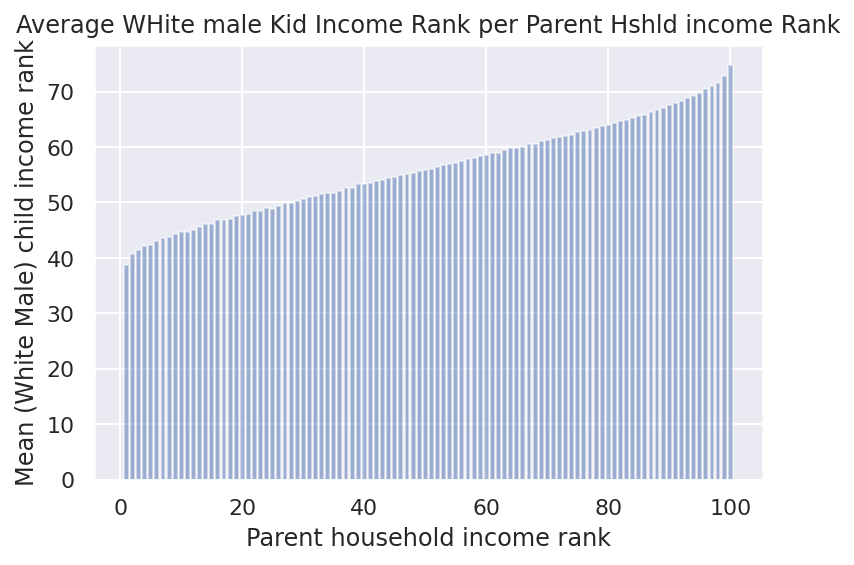

In [38]:
plt.bar(df3['par_pctile'],df3['kir_white_male'], align='center', alpha=0.5)

plt.xlabel('Parent household income rank')
plt.ylabel('Mean (White Male) child income rank')
plt.title('Average WHite male Kid Income Rank per Parent Hshld income Rank')

plt.show()

## Average White Female Kid Individual Income Rank per Parent Household Income Rank

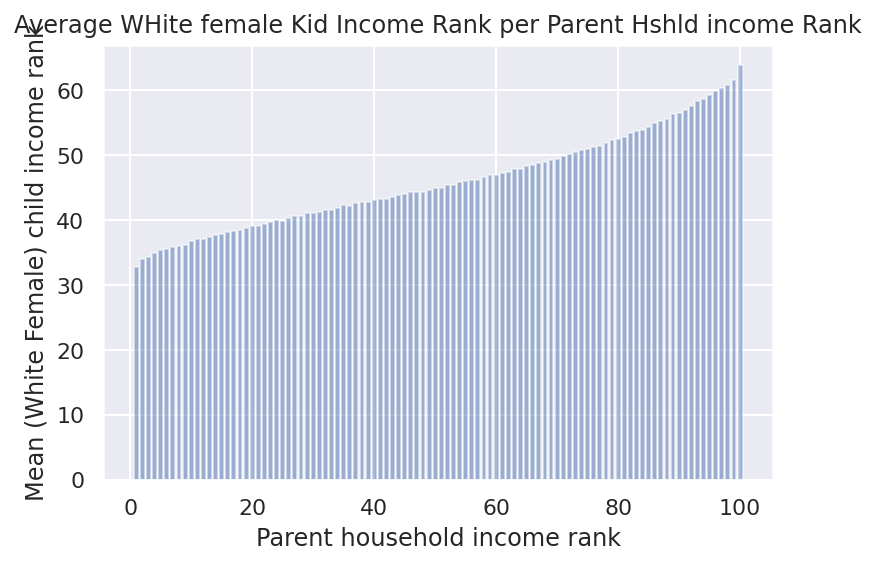

In [44]:
plt.bar(df3['par_pctile'],df3['kir_white_female'], align='center', alpha=0.5)

plt.xlabel('Parent household income rank')
plt.ylabel('Mean (White Female) child income rank')
plt.title('Average WHite female Kid Income Rank per Parent Hshld income Rank')

plt.show()

## Average White Male Kid Individual Income Rank with 2 Parents per Parent Household Income Rank

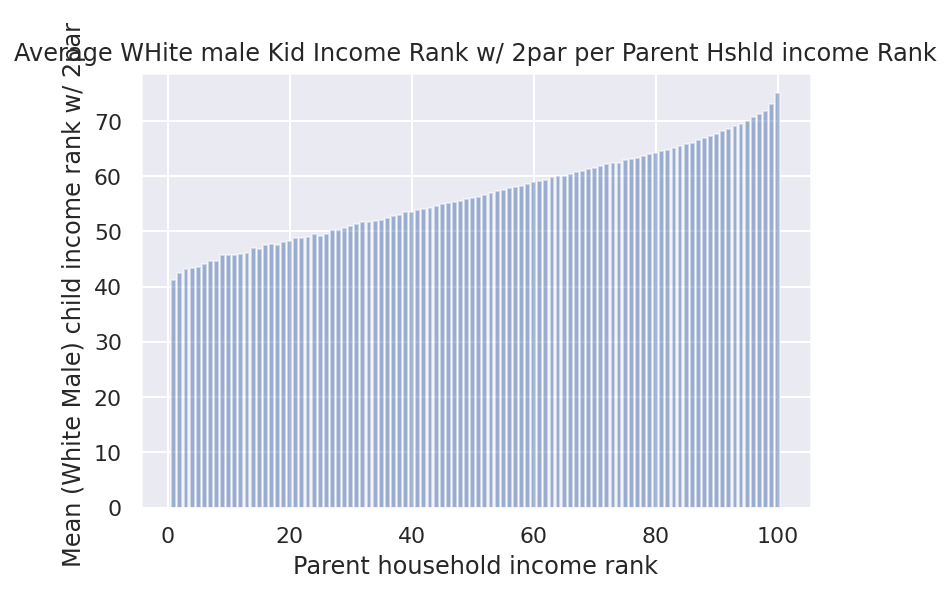

In [39]:
plt.bar(df3['par_pctile'],df3['kir_2par_white_male'], align='center', alpha=0.5)

plt.xlabel('Parent household income rank')
plt.ylabel('Mean (White Male) child income rank w/ 2par ')
plt.title('Average WHite male Kid Income Rank w/ 2par per Parent Hshld income Rank')

plt.show()

## Average White Male Kid Individual Income Rank with 1 Parent per Parent Household Income Rank

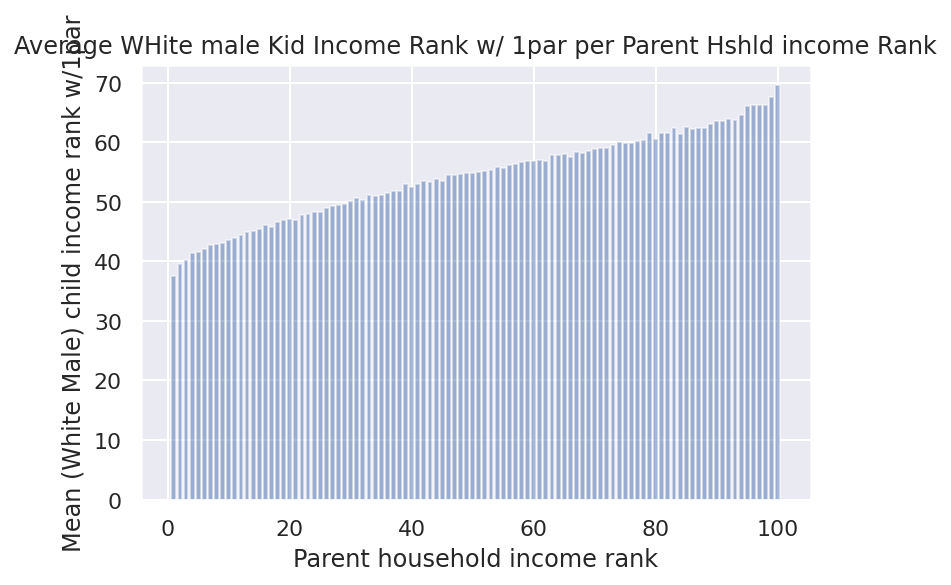

In [53]:
plt.bar(df3['par_pctile'],df3['kir_1par_white_male'], align='center', alpha=0.5)

plt.xlabel('Parent household income rank')
plt.ylabel('Mean (White Male) child income rank w/1par')
plt.title('Average WHite male Kid Income Rank w/ 1par per Parent Hshld income Rank')

plt.show()

## Average Black Male Kid Individual Income Rank with 2 Parents per Parent Household Income Rank

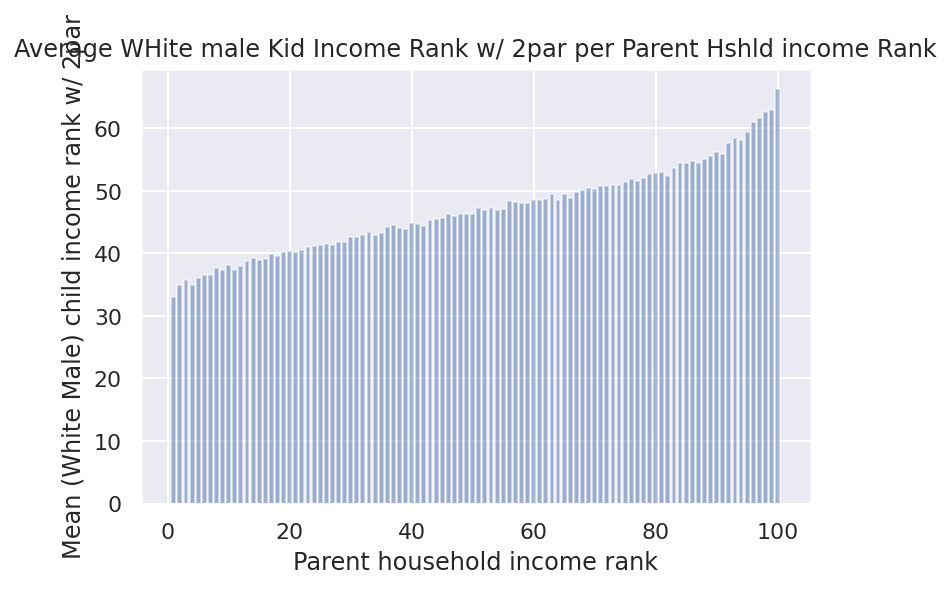

In [50]:
plt.bar(df3['par_pctile'],df3['kir_2par_black_male'], align='center', alpha=0.5)

plt.xlabel('Parent household income rank')
plt.ylabel('Mean (White Male) child income rank w/ 2par')
plt.title('Average WHite male Kid Income Rank w/ 2par per Parent Hshld income Rank')

plt.show()

## Average Black Male Kid Individual Income Rank with 1 Parent per Parent Household Income Rank

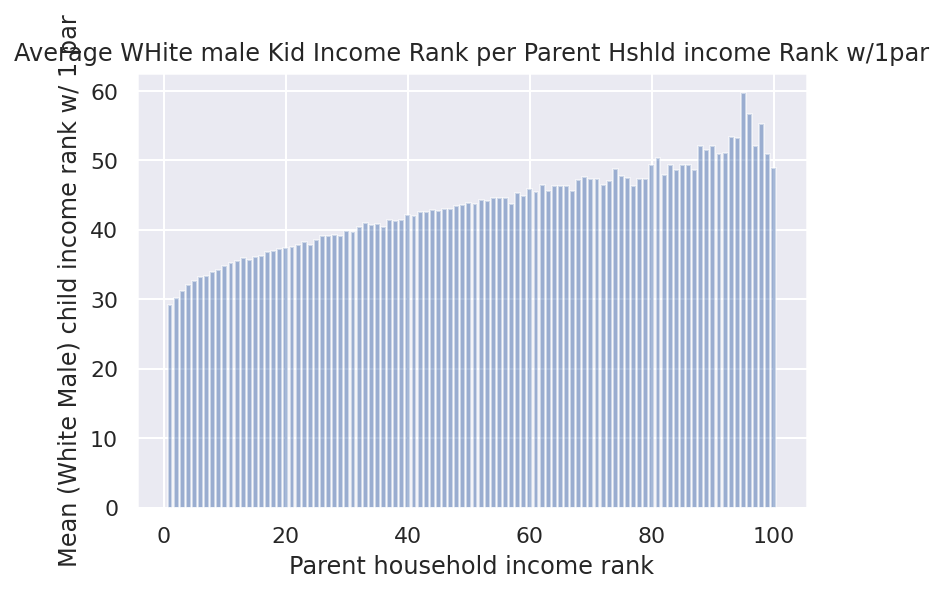

In [51]:
plt.bar(df3['par_pctile'],df3['kir_1par_black_male'], align='center', alpha=0.5)

plt.xlabel('Parent household income rank')
plt.ylabel('Mean (White Male) child income rank w/ 1 par')
plt.title('Average WHite male Kid Income Rank per Parent Hshld income Rank w/1par')

plt.show()

## Observations
##### For visualization results, we made use of the third dataframe we uploaded by plotting graphs that focused on race and income. The first trend we visualize with a bar plot is that average kid household income rank increases as the average parent income rank increases. Then we looked at how race and gender affect the bar plots. Black females have a lower average household income rank per average parent income rank than white females. White females have a lower average household income rank per average parent income rank than white males. Another observation we had was that, regardless of race, the average individual kid income rank per average parent income rank was higher when the kids grew up in a family with 2 parents compared to those who grew up with 1 parent.